# Logistic Regression

## Importing the libraries

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Load data

In [42]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/tae/tae.names
    
    
PATH_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/tae/tae.data"

col_ls = [
"TA_native_speaker",
"Course_instructor",
"Course",
"Type_Semester",
"Class_size",
'Class_Attribute']

df = pd.read_csv(PATH_URL,names=col_ls)

df['Type_Semester'] = df['Type_Semester'].replace(1, 'Summer')
df['Type_Semester'] = df['Type_Semester'].replace(2, 'Regular')

df['TA_native_speaker'] = df['TA_native_speaker'].replace(1, 'English speaker')
df['TA_native_speaker'] = df['TA_native_speaker'].replace(2, 'non-English speaker')




# Teaching Assistant Evaluation Dataset
df.head()



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1591  100  1591    0     0   1518      0  0:00:01  0:00:01 --:--:--  1518


1. Title: Teaching Assistant Evaluation

2. Sources:
   (a) Collector: Wei-Yin Loh (Department of Statistics, UW-Madison)
   (b) Donor:     Tjen-Sien Lim (limt@stat.wisc.edu)
   (b) Date:      June 7, 1997

3. Past Usage:
   1. Loh, W.-Y. & Shih, Y.-S. (1997). Split Selection Methods for 
      Classification Trees, Statistica Sinica 7: 815-840.
   2. Lim, T.-S., Loh, W.-Y. & Shih, Y.-S. (1999). A Comparison of
      Prediction Accuracy, Complexity, and Training Time of
      Thirty-three Old and New Classification Algorithms. Machine
      Learning. Forthcoming.
      (ftp://ftp.stat.wisc.edu/pub/loh/treeprogs/quest1.7/mach1317.pdf or
      (http://www.stat.wisc.edu/~limt/mach1317.pdf)

4. Relevant Information:
   The data consist of evaluations of teaching performance over three
   regular semesters and two summer semesters of 151 teaching assistant
   (TA) assignments at the Statistics Department of the University of
   Wisconsin-Madison. The scores were divided into 3 roughly equal

,TA_native_speaker,Course_instructor,Course,Type_Semester,Class_size,Class_Attribute
0,English speaker,23,3,Summer,19,3
1,non-English speaker,15,3,Summer,17,3
2,English speaker,23,3,Regular,49,3
3,English speaker,5,2,Regular,33,3
4,non-English speaker,7,11,Regular,55,3


## EDA

In [43]:
df.describe(include = 'all')

,TA_native_speaker,Course_instructor,Course,Type_Semester,Class_size,Class_Attribute
count,151,151.000000,151.000000,151,151.000000,151.000000
unique,2,NaN,NaN,2,NaN,NaN
top,non-English speaker,NaN,NaN,Regular,NaN,NaN
freq,122,NaN,NaN,128,NaN,NaN
mean,NaN,13.642384,8.105960,NaN,27.867550,2.019868
std,NaN,6.825779,7.023914,NaN,12.893758,0.820327
min,NaN,1.000000,1.000000,NaN,3.000000,1.000000
25%,NaN,8.000000,3.000000,NaN,19.000000,1.000000
50%,NaN,13.000000,4.000000,NaN,27.000000,2.000000
75%,NaN,20.000000,15.000000,NaN,37.000000,3.000000


<Figure size 576x576 with 0 Axes>

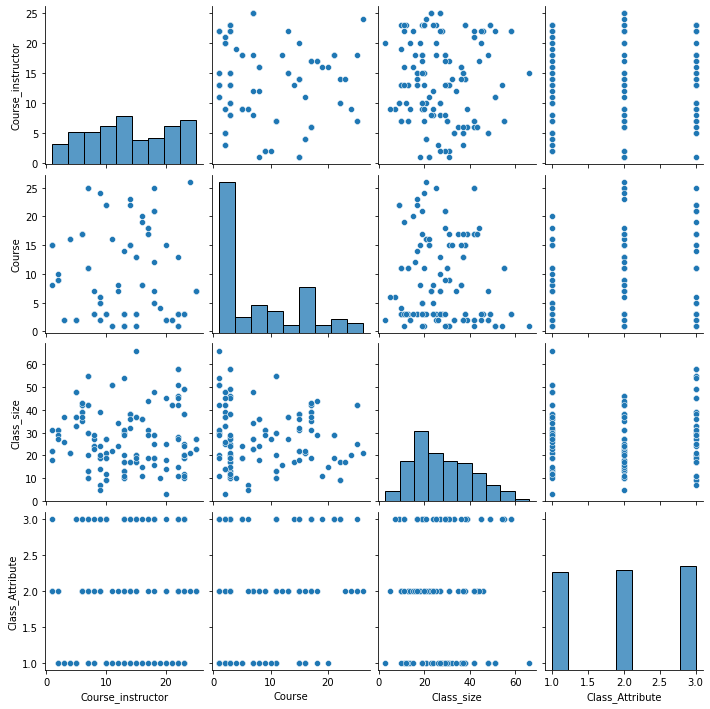

In [44]:
# plot the relations between columns
plt.figure(figsize=(8, 8))
sns.pairplot(df)


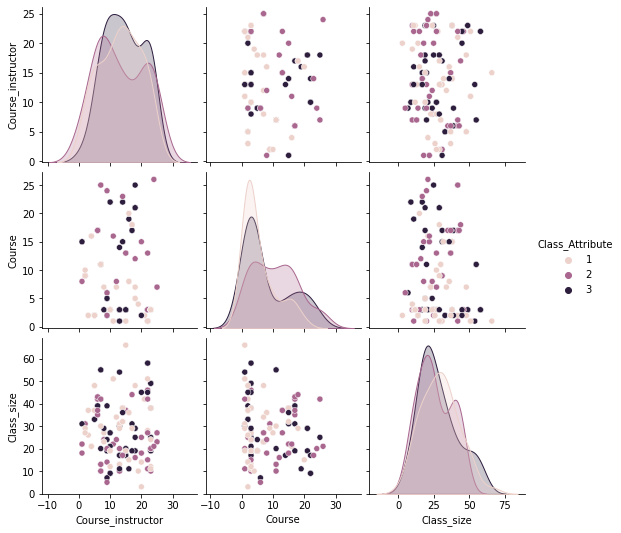

In [45]:
sns.pairplot(df, hue='Class_Attribute')

In [46]:
df.Class_Attribute.value_counts()

3    52
2    50
1    49
Name: Class_Attribute, dtype: int64

In [47]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Course_instructor,Course,Class_size,Class_Attribute
Course_instructor,1.000000,-0.236010,-0.035765,0.075095
Course,-0.236010,1.000000,-0.033485,0.143103
Class_size,-0.035765,-0.033485,1.000000,-0.035676
Class_Attribute,0.075095,0.143103,-0.035676,1.000000


## feature set 

In [180]:
df['Type_Semester'] = df['Type_Semester'].replace('Summer',1)
df['Type_Semester'] = df['Type_Semester'].replace('Regular',2)

# feature set 
X = df.iloc[:, 1:4]
y = df.iloc[:, -1]  # The Target

In [181]:
X.head()

,Course_instructor,Course,Type_Semester
0,23,3,1
1,15,3,1
2,23,3,2
3,5,2,2
4,7,11,2


In [182]:
y.head()

0    3
1    3
2    3
3    3
4    3
Name: Class_Attribute, dtype: int64

## Logistic Regression model

In [183]:
# split data

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 0)


In [184]:
#Logistic Regression

classifier = LogisticRegression()

classifier.fit(X_train, y_train)

LogisticRegression()

In [185]:
# Predicting the Test set results

y_pred = classifier.predict(X_test)

print(y_pred)

[1 3 3 1 1 2 3 3 1 1 2 2 1 2 2 1 3 2 1 1 2 2 2 3 1 1 3 2 2 1 1 1 2 1 2 1 3
 2]


In [186]:
test_dataset = pd.DataFrame(X_test, columns= ['Type_Semester', 'Class_size'])

test_dataset['Actual_Purchased'] = y_test.to_numpy()
test_dataset['Predict_Purchased'] = y_pred

test_dataset.head()

,Type_Semester,Class_size,Actual_Purchased,Predict_Purchased
114,2,NaN,1,1
62,1,NaN,2,3
33,1,NaN,1,3
107,2,NaN,1,1
7,2,NaN,3,1


In [187]:
#test the model
(test_dataset['Actual_Purchased'] == test_dataset['Predict_Purchased']).value_counts()

True     20
False    18
dtype: int64

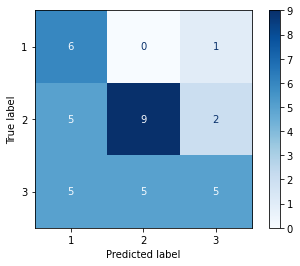

In [188]:
plot_confusion_matrix(classifier, X=X_test, y_true=y_test, cmap='Blues')

In [189]:
classifier.score(X_test, y_test) 

0.5263157894736842